In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
import xgboost as xgb

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **EDA and cleaning for college data for cluster**

In [ ]:
ID_to_use = pd.read_csv('/content/drive/MyDrive/College Scorecard Datasets/college data for regression.csv').dropna()['School ID']
ID_to_use

0       100654
1       100663
2       100706
3       100724
4       100751
         ...  
1824    456959
1885    482149
1900    482680
1907    484473
1927    486840
Name: School ID, Length: 808, dtype: int64

In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/College Scorecard Datasets/college data for clustering wo subject.csv')
data_school = raw_df[raw_df['School ID'].isin(ID_to_use)][['School ID', 'School Name', 'School State', 'Admission rate']].set_index('School ID')
data_school

,School Name,School State,Admission rate
School ID,,,
100654,Alabama A & M University,AL,0.8965
100663,University of Alabama at Birmingham,AL,0.8060
100706,University of Alabama in Huntsville,AL,0.7711
100724,Alabama State University,AL,0.9888
100751,The University of Alabama,AL,0.8039
...,...,...,...
456959,University of Minnesota-Rochester,MN,0.7375
482149,Augusta University,GA,0.8288
482680,University of North Georgia,GA,0.8145


In [ ]:
df = raw_df[raw_df['School ID'].isin(ID_to_use)].drop(['Unnamed: 0', 'Admission rate', 'School Name', 'School State'], axis = 1).set_index('School ID')
df.head()

,Average of SAT score of students admitted,% of undergraduates who receive a Pell Grant,Students who are white,Students who are black,Students who are hispanic,Students who are asian,average family income,median family income,%parents from middleschool,%parents from highschool,%parents from college,Lattitude,Longitude
School ID,,,,,,,,,,,,,
100654,959.0,0.7095,0.0159,0.9022,0.0116,0.0012,32362.0,23553.0,0.016422,0.349406,0.634172,34.783368,-86.568502
100663,1245.0,0.3397,0.5496,0.2401,0.0610,0.0704,51306.0,34489.0,0.022267,0.318957,0.658776,33.505697,-86.799345
100706,1300.0,0.2403,0.7173,0.0907,0.0599,0.0354,61096.0,44787.0,0.019824,0.290308,0.689868,34.724557,-86.640449
100724,938.0,0.7368,0.0167,0.9265,0.0130,0.0019,31684.0,22080.0,0.018825,0.324610,0.656566,32.364317,-86.295677
100751,1262.0,0.1718,0.7695,0.1024,0.0512,0.0131,91846.0,66733.0,0.008161,0.217552,0.774287,33.211875,-87.545978


In [ ]:
df.shape

(808, 13)

In [ ]:
df.describe()

,Average of SAT score of students admitted,% of undergraduates who receive a Pell Grant,Students who are white,Students who are black,Students who are hispanic,Students who are asian,average family income,median family income,%parents from middleschool,%parents from highschool,%parents from college,Lattitude,Longitude
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,1137.042079,0.348774,0.531123,0.144465,0.141103,0.057767,65342.193069,49190.043317,0.030742,0.295339,0.673919,38.208651,-89.300072
std,130.791625,0.138023,0.221428,0.186204,0.132635,0.071690,22383.086992,19722.841956,0.023879,0.079996,0.093138,4.961980,15.041138
min,842.000000,0.098500,0.001000,0.003700,0.000000,0.000000,21021.000000,10702.000000,0.002952,0.085406,0.384661,18.344193,-158.056403
25%,1050.000000,0.247325,0.408225,0.046975,0.056950,0.013975,49690.750000,35211.000000,0.016066,0.242706,0.608925,34.406463,-95.256799
50%,1112.000000,0.339800,0.579300,0.082700,0.097650,0.028250,61215.000000,44344.000000,0.023887,0.308541,0.664882,39.296865,-85.823890
75%,1201.250000,0.431275,0.700225,0.156325,0.175925,0.068575,79484.250000,61943.250000,0.036954,0.354869,0.734377,41.740795,-78.633598
max,1550.000000,0.850800,0.931500,0.961300,0.953800,0.374600,144616.000000,121852.000000,0.201153,0.477686,0.900498,64.857560,-64.972866


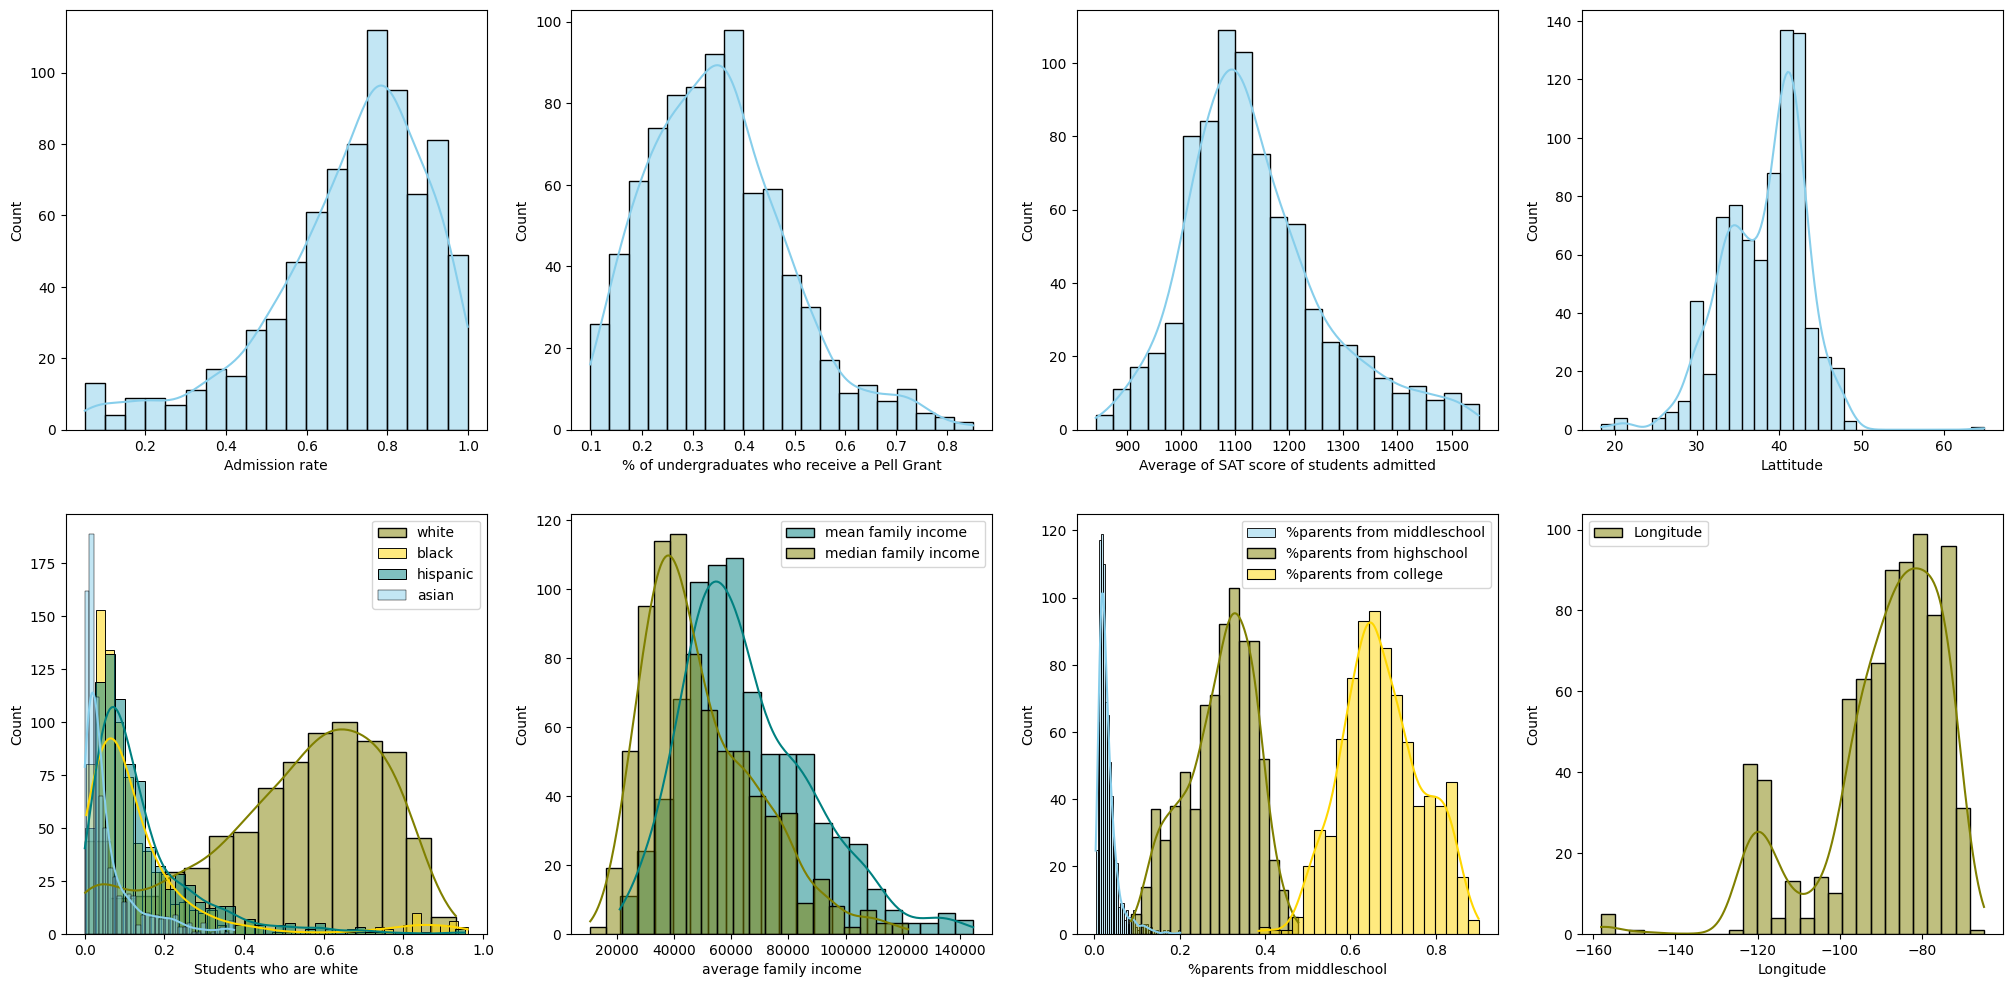

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(25, 12))

sns.histplot(data=data_school, x="Admission rate", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="% of undergraduates who receive a Pell Grant", kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=df, x="Average of SAT score of students admitted", kde=True, color="skyblue", ax=axs[0, 2])
sns.histplot(data=df, x="Lattitude", kde=True, color="skyblue", label="Lattitude", ax=axs[0, 3])
sns.histplot(data=df, x="Longitude", kde=True, color="olive", label="Longitude", ax=axs[1, 3])
sns.histplot(data=df, x="Students who are white", kde=True, color="olive", label="white", ax=axs[1, 0])
sns.histplot(data=df, x="Students who are black", kde=True, color="gold", label="black", ax=axs[1, 0])
sns.histplot(data=df, x="Students who are hispanic", kde=True, color="teal", label="hispanic", ax=axs[1, 0])
sns.histplot(data=df, x="Students who are asian", kde=True, color="skyblue", label="asian", ax=axs[1, 0])
sns.histplot(data=df, x="average family income", kde=True, color="teal", label="mean family income", ax=axs[1, 1])
sns.histplot(data=df, x="median family income", kde=True, color="olive", label="median family income", ax=axs[1, 1])
sns.histplot(data=df, x="%parents from middleschool", kde=True, color="skyblue", label="%parents from middleschool", ax=axs[1, 2])
sns.histplot(data=df, x="%parents from highschool", kde=True, color="olive", label="%parents from highschool", ax=axs[1, 2])
sns.histplot(data=df, x="%parents from college", kde=True, color="gold", label="%parents from college", ax=axs[1, 2])

for ax in axs[1]:
  ax.legend()
plt.show()

In [ ]:
data_scaler = StandardScaler()
df_cluster_scaled = pd.DataFrame(data_scaler.fit_transform(df.drop(['average family income'], axis = 1)), 
                                 columns = df.drop(['average family income'], axis = 1).columns) #average dropped as clusters looks better using median
df_cluster_scaled.head()

,Average of SAT score of students admitted,% of undergraduates who receive a Pell Grant,Students who are white,Students who are black,Students who are hispanic,Students who are asian,median family income,%parents from middleschool,%parents from highschool,%parents from college,Lattitude,Longitude
0,-1.362108,2.615146,-2.328263,4.071895,-0.976988,-0.789539,-1.300671,-0.600065,0.676299,-0.427023,-0.690733,0.181719
1,0.825930,-0.065785,0.083498,0.513919,-0.604307,0.176325,-0.745843,-0.355148,0.295428,-0.162688,-0.948385,0.166362
2,1.246707,-0.786404,0.841325,-0.288923,-0.612605,-0.312190,-0.223384,-0.457520,-0.062919,0.171341,-0.702593,0.176933
3,-1.522768,2.813063,-2.324648,4.202478,-0.966427,-0.779768,-1.375402,-0.499390,0.366136,-0.186438,-1.178553,0.199869
4,0.955989,-1.283007,1.077214,-0.226050,-0.678240,-0.623444,0.890025,-0.946237,-0.972990,1.078294,-1.007636,0.116692


In [ ]:
df_cluster_scaled.shape

(808, 12)

drop check that there are 12 features

# **Building unsupervised model to cluster colleges together**

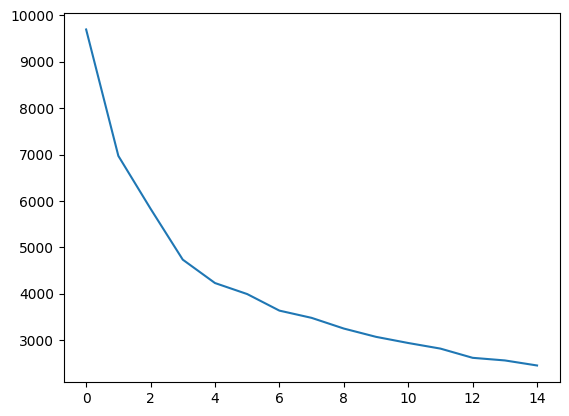

In [ ]:
inertia = []
for n in range(1, 16):
  eda_model = KMeans(n_clusters = n, n_init='auto', random_state=42)
  eda_model.fit(df_cluster_scaled)
  inertia.append(eda_model.inertia_)

plt.plot(inertia)

**Check cluster sizes**

In [ ]:
cluster_spread = []
for n in range(3, 16):
  km_model = KMeans(n_clusters = n, n_init='auto', random_state = 42)
  km_model.fit(df_cluster_scaled)
  cluster_spread.append(np.unique(km_model.labels_, return_counts=True)[1])
cluster_spread = pd.DataFrame(cluster_spread)
cluster_spread.T
#sns.scatterplot(data=df_cluster_scaled, x=df_cluster_scaled['median family income'], y=df_cluster_scaled['Average of SAT score of students admitted'], hue='cluster', palette="deep")

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,245.0,257.0,136.0,103.0,73.0,126.0,70.0,65.0,62.0,58.0,51.0,49.0,45.0
1,173.0,47.0,282.0,201.0,214.0,201.0,179.0,160.0,160.0,107.0,115.0,51.0,49.0
2,390.0,398.0,255.0,187.0,66.0,225.0,226.0,186.0,189.0,134.0,41.0,41.0,39.0
3,NaN,106.0,89.0,85.0,70.0,79.0,75.0,65.0,57.0,60.0,53.0,45.0,39.0
4,NaN,NaN,46.0,186.0,225.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
5,NaN,NaN,NaN,46.0,46.0,42.0,32.0,35.0,31.0,31.0,32.0,31.0,24.0
6,NaN,NaN,NaN,NaN,114.0,36.0,30.0,25.0,25.0,25.0,25.0,24.0,23.0
7,NaN,NaN,NaN,NaN,NaN,54.0,41.0,48.0,46.0,37.0,38.0,38.0,32.0
8,NaN,NaN,NaN,NaN,NaN,NaN,110.0,102.0,104.0,96.0,94.0,92.0,82.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,84.0,84.0,101.0,77.0,89.0


In [ ]:
clusters = 3
km_model = KMeans(n_clusters = clusters, n_init='auto', random_state=42)
km_model.fit(df_cluster_scaled)
df_cluster = df.drop(['average family income'], axis = 1)
df_cluster['cluster'] = km_model.labels_
df_cluster.index = df.index
np.bincount(km_model.labels_)

array([245, 173, 390])

In [ ]:
y = pd.read_csv('/content/drive/MyDrive/College Scorecard Datasets/college data for regression.csv').dropna()['median earnings 6 years after entry']
test_x = []
test_y = []
test_cv_score_xgb = []
test_cv_score_lm = []
test_cv_score_boost = []
test_cv_score_rf = []
for i in range(clusters):
  test_x.append(df_cluster_scaled.drop(['% of undergraduates who receive a Pell Grant'], axis = 1)[km_model.labels_ == i]) #.drop(['% of undergraduates who receive a Pell Grant'], axis = 1)
  test_y.append(y[km_model.labels_ == i])
  test_cv_score_xgb.append(cross_val_score(xgb.XGBRegressor(random_state = 42), test_x[i], test_y[i], cv=5))
  test_cv_score_lm.append(cross_val_score(ElasticNet(random_state = 42), test_x[i], test_y[i], cv=5))
  test_cv_score_boost.append(cross_val_score(AdaBoostRegressor(random_state = 42), test_x[i], test_y[i], cv=5))
  test_cv_score_rf.append(cross_val_score(RandomForestRegressor(random_state = 42), test_x[i], test_y[i], cv=5))
  
print('xgb')
print(*test_cv_score_xgb, sep = '\n')
print(np.mean(test_cv_score_xgb))
print('elasticnet')
print(*test_cv_score_lm, sep = '\n')
print(np.mean(test_cv_score_lm))
print('adaboost')
print(*test_cv_score_boost, sep = '\n')
print(np.mean(test_cv_score_boost))
print('randomforest')
print(*test_cv_score_rf, sep = '\n')
print(np.mean(test_cv_score_rf))

xgb
[0.47466337 0.44417772 0.5207016  0.5672528  0.35246632]
[0.61859216 0.43945134 0.55771823 0.73308052 0.44972018]
[0.50383892 0.03437004 0.64184954 0.29634881 0.68125443]
0.48769906558955006
elasticnet
[0.55575772 0.37606129 0.56853192 0.53426009 0.39823768]
[0.65080628 0.6220763  0.58328211 0.6026329  0.64998241]
[0.31973958 0.23459394 0.3855316  0.22045594 0.45607508]
0.4772016560246454
adaboost
[0.53885697 0.51556042 0.66453796 0.54064641 0.45988258]
[0.66741788 0.53160231 0.57532479 0.71771355 0.43467203]
[0.3916059  0.24043575 0.570715   0.3756724  0.55662668]
0.5187513752077094
randomforest
[0.52748471 0.53731977 0.66728858 0.59766081 0.34261471]
[0.66111508 0.41155762 0.69104473 0.72642149 0.57468713]
[0.51002992 0.17929117 0.64372474 0.45591791 0.61497006]
0.5427418957585978


<Axes: xlabel='Lattitude', ylabel='Longitude'>

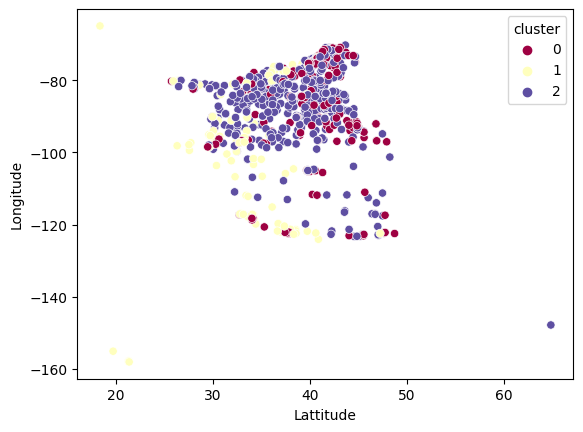

In [ ]:
sns.scatterplot(data=df_cluster, x="Lattitude", y="Longitude", hue = 'cluster', palette="Spectral")

In [ ]:
school_clustered = pd.DataFrame(km_model.labels_, columns= ['clusters'], index = df.index)
school_clustered = school_clustered.join(data_school.drop('Admission rate', axis = 1))
school_clustered.head()

,clusters,School Name,School State
School ID,,,
100654,1,Alabama A & M University,AL
100663,2,University of Alabama at Birmingham,AL
100706,2,University of Alabama in Huntsville,AL
100724,1,Alabama State University,AL
100751,0,The University of Alabama,AL


# **Build fake test data**

In [ ]:
us_states = pd.read_csv('/content/drive/MyDrive/College Scorecard Datasets/world_country_and_usa_states_latitude_and_longitude_values.csv').iloc[:,4:].dropna().set_index('usa_state_code')
features = pd.DataFrame(df_cluster_scaled.columns)
features

,0
0,Average of SAT score of students admitted
1,% of undergraduates who receive a Pell Grant
2,Students who are white
3,Students who are black
4,Students who are hispanic
5,Students who are asian
6,median family income
7,%parents from middleschool
8,%parents from highschool
9,%parents from college


In [ ]:
require_grant = [1, 1, 1] #0 for not require, and 1 for require
#course = [11, 8, 20] #refer to list of subjects
ethincity = [2, 4, 3] #2: white, 3: black, 4: hispanic, 5: asian
family_income = [45000, 60000, 75000] #between 30000 to 100000
parent_education = [8, 7, 9] #6: middle, 7: high, 0: college
location = ['CA', 'GA', 'WA'] #refer to table of us states
SAT_score = [1300, 1200, 1400] # between 800 to 1600
test_df = df_cluster_scaled.iloc[0:len(location)] #set test to no. of dataset
test_df[:] = 0.0
i = 0
for grant, eth, income, pedu, location, SAT in zip(require_grant, ethincity, family_income, parent_education, location, SAT_score):
  test_df.iloc[i]['Average of SAT score of students admitted'] = SAT
  test_df.iloc[i]['% of undergraduates who receive a Pell Grant'] = grant
  #test_df.iloc[i, course] = 1
  test_df.iloc[i, eth] = 1
  test_df.iloc[i, pedu] = 1
  test_df.iloc[i]['median family income'] = income
  test_df.iloc[i]['Lattitude'] = us_states.loc[location]['usa_state_latitude']
  test_df.iloc[i]['Longitude'] = us_states.loc[location]['usa_state_longitude']
  i += 1
test_df.head()

<ipython-input-99-bd4d1a1a66a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[:] = 0.0
<ipython-input-99-bd4d1a1a66a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[:] = 0.0
<ipython-input-99-bd4d1a1a66a9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.iloc[i, eth] = 1
<ipython-input-99-bd4d1a1a66a9>:16: SettingWithCopyWarning: 
A value is trying 

,Average of SAT score of students admitted,% of undergraduates who receive a Pell Grant,Students who are white,Students who are black,Students who are hispanic,Students who are asian,median family income,%parents from middleschool,%parents from highschool,%parents from college,Lattitude,Longitude
0,1300.0,1.0,1.0,0.0,0.0,0.0,45000.0,0.0,1.0,0.0,36.778261,-119.417932
1,1200.0,1.0,0.0,0.0,1.0,0.0,60000.0,1.0,0.0,0.0,32.157435,-82.907123
2,1400.0,1.0,0.0,1.0,0.0,0.0,75000.0,0.0,0.0,1.0,47.751074,-120.740139


Scale the fake test data

In [ ]:
test_df_scaled = pd.DataFrame(data_scaler.transform(test_df), columns = test_df.columns)
test_df_scaled

,Average of SAT score of students admitted,% of undergraduates who receive a Pell Grant,Students who are white,Students who are black,Students who are hispanic,Students who are asian,median family income,%parents from middleschool,%parents from highschool,%parents from college,Lattitude,Longitude
0,1.246707,4.721179,2.118831,-0.776324,-1.064501,-0.806288,-0.212578,-1.288215,8.814198,-7.240194,-0.288449,-2.003606
1,0.481659,4.721179,-2.400114,-0.776324,6.479660,-0.806288,0.548433,40.615717,-3.694217,-7.240194,-1.220272,0.425294
2,2.011756,4.721179,-2.400114,4.597451,-1.064501,-0.806288,1.309443,-1.288215,-3.694217,3.503219,1.924299,-2.091567


# **Check fake test data with cluster and do eyeball checks**

In [ ]:
classifier_model = KNeighborsClassifier(n_neighbors = 10)
classifier_model.fit(df_cluster_scaled, km_model.labels_)
test_outcome = classifier_model.predict(test_df_scaled)
test_outcome

array([2, 1, 1], dtype=int32)

In [ ]:
test_outcome2 = km_model.predict(test_df_scaled)
test_outcome2

array([1, 1, 0], dtype=int32)

In [ ]:
kn_model = NearestNeighbors(n_neighbors = 10)
kn_model.fit(df_cluster_scaled)
neighbours = kn_model.kneighbors(test_df_scaled, return_distance=True)
print(neighbours[0])
neighbours = list(map(lambda x:km_model.labels_[x], neighbours[1]))
neighbours

[[10.09875157 10.30781168 10.3205783  10.39880289 10.46065696 10.4817503
  10.53748626 10.56191362 10.57333175 10.69371201]
 [34.49150238 35.84305337 36.09734195 37.01687601 37.1549916  37.18929918
  37.468055   37.88709748 37.92172231 37.97619246]
 [ 7.20766608  7.54370028  7.64033711  7.88845532  7.92759566  7.99046043
   8.10767654  8.16659326  8.17876433  8.28756591]]


[array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
 array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)]

**Do eyeball check between mean of clusters and fake test data** 

In [ ]:
df_cluster['cluster'] = km_model.labels_
cluster_mean = pd.DataFrame()
for i in range(clusters):
    cluster_mean = pd.concat([cluster_mean, np.mean(df_cluster[df_cluster['cluster'] == i], axis = 0)], axis = 1)
cluster_mean = cluster_mean.T
cluster_mean['cluster'] = cluster_mean['cluster'].astype(int)
cluster_mean = cluster_mean.set_index('cluster')
cluster_mean

,Average of SAT score of students admitted,% of undergraduates who receive a Pell Grant,Students who are white,Students who are black,Students who are hispanic,Students who are asian,median family income,%parents from middleschool,%parents from highschool,%parents from college,Lattitude,Longitude
cluster,,,,,,,,,,,,
0,1274.036735,0.216800,0.605014,0.057453,0.108492,0.092778,70828.257143,0.019190,0.199433,0.781377,40.117751,-87.078154
1,1036.832370,0.506451,0.216223,0.304078,0.278915,0.074524,30729.364162,0.058021,0.359833,0.582147,34.867414,-96.479283
2,1095.433333,0.361737,0.624390,0.128324,0.100457,0.028340,43785.774359,0.025899,0.326978,0.647123,38.491483,-87.511268


In [ ]:
test_df.index = test_outcome
test_df

,Average of SAT score of students admitted,% of undergraduates who receive a Pell Grant,Students who are white,Students who are black,Students who are hispanic,Students who are asian,median family income,%parents from middleschool,%parents from highschool,%parents from college,Lattitude,Longitude
2,1300.0,1.0,1.0,0.0,0.0,0.0,45000.0,0.0,1.0,0.0,36.778261,-119.417932
1,1200.0,1.0,0.0,0.0,1.0,0.0,60000.0,1.0,0.0,0.0,32.157435,-82.907123
1,1400.0,1.0,0.0,1.0,0.0,0.0,75000.0,0.0,0.0,1.0,47.751074,-120.740139


**For looking at stats for different cluster**

In [ ]:
num = 0
temp = df_cluster[df_cluster['cluster'] == num]
temp.describe()

,Average of SAT score of students admitted,% of undergraduates who receive a Pell Grant,Students who are white,Students who are black,Students who are hispanic,Students who are asian,median family income,%parents from middleschool,%parents from highschool,%parents from college,Lattitude,Longitude,cluster
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.0
mean,1274.036735,0.216800,0.605014,0.057453,0.108492,0.092778,70828.257143,0.019190,0.199433,0.781377,40.117751,-87.078154,0.0
std,117.156171,0.065811,0.168722,0.034950,0.054747,0.079576,17500.654125,0.011004,0.048974,0.053147,4.168135,14.635874,0.0
min,1055.000000,0.098500,0.186400,0.003800,0.011200,0.010100,31227.000000,0.002952,0.085406,0.638591,25.721260,-123.108777,0.0
25%,1185.000000,0.171400,0.475800,0.033800,0.068600,0.032200,59409.000000,0.011401,0.160563,0.737761,38.219279,-93.182039,0.0
50%,1248.000000,0.212800,0.635100,0.051400,0.099000,0.063000,70535.000000,0.016164,0.200174,0.785915,40.768787,-83.925852,0.0
75%,1352.000000,0.259400,0.746100,0.071000,0.137100,0.135400,80202.000000,0.023921,0.238606,0.824726,42.622969,-75.355363,0.0
max,1550.000000,0.464600,0.894500,0.201300,0.300300,0.374200,121852.000000,0.070702,0.311727,0.900498,48.737812,-70.932465,0.0


# **Build Regression model within clusters to predict earnings and debt post college**

**Initial EDA**

In [ ]:
df_reg = pd.read_csv('/content/drive/MyDrive/College Scorecard Datasets/college data for regression.csv').dropna().set_index('School ID')
df_reg['cluster'] = km_model.labels_
cluster = []
for i in range(clusters):
  cluster.append(df_reg[df_reg['cluster'] == i])
cluster[0].head()

,Average SAT score,% undergraduates receive Pell Grant,median debt for Pell students,median debt for no-Pell students,median earnings 6 years after entry,5-year repayment rate with pell grant,5-year repayment rate w/o pell grant,Students who are white,Students who are black,Students who are hispanic,Students who are asian,median family income,%parents from middleschool,%parents from highschool,%parents from college,cluster
School ID,,,,,,,,,,,,,,,,
100751,1262.0,0.1718,19500.0,15000.0,44485.0,0.551958,0.739214,0.7695,0.1024,0.0512,0.0131,66733.0,0.008161,0.217552,0.774287,0
100858,1302.0,0.1343,19750.0,15000.0,49695.0,0.706790,0.848079,0.8101,0.0465,0.0355,0.0238,72031.0,0.006561,0.166086,0.827353,0
106397,1236.0,0.1858,16848.0,14475.0,43807.0,0.631250,0.775570,0.7454,0.0417,0.0995,0.0271,64201.0,0.023404,0.236558,0.740039,0
107044,1207.0,0.2286,24959.0,19500.0,39240.0,0.708625,0.835586,0.7993,0.0484,0.0392,0.0120,71055.0,0.010815,0.194665,0.794521,0
110097,1196.0,0.2775,21354.0,15750.0,42464.0,0.752422,0.878244,0.4285,0.0310,0.2085,0.1537,60489.0,0.016667,0.218841,0.764493,0


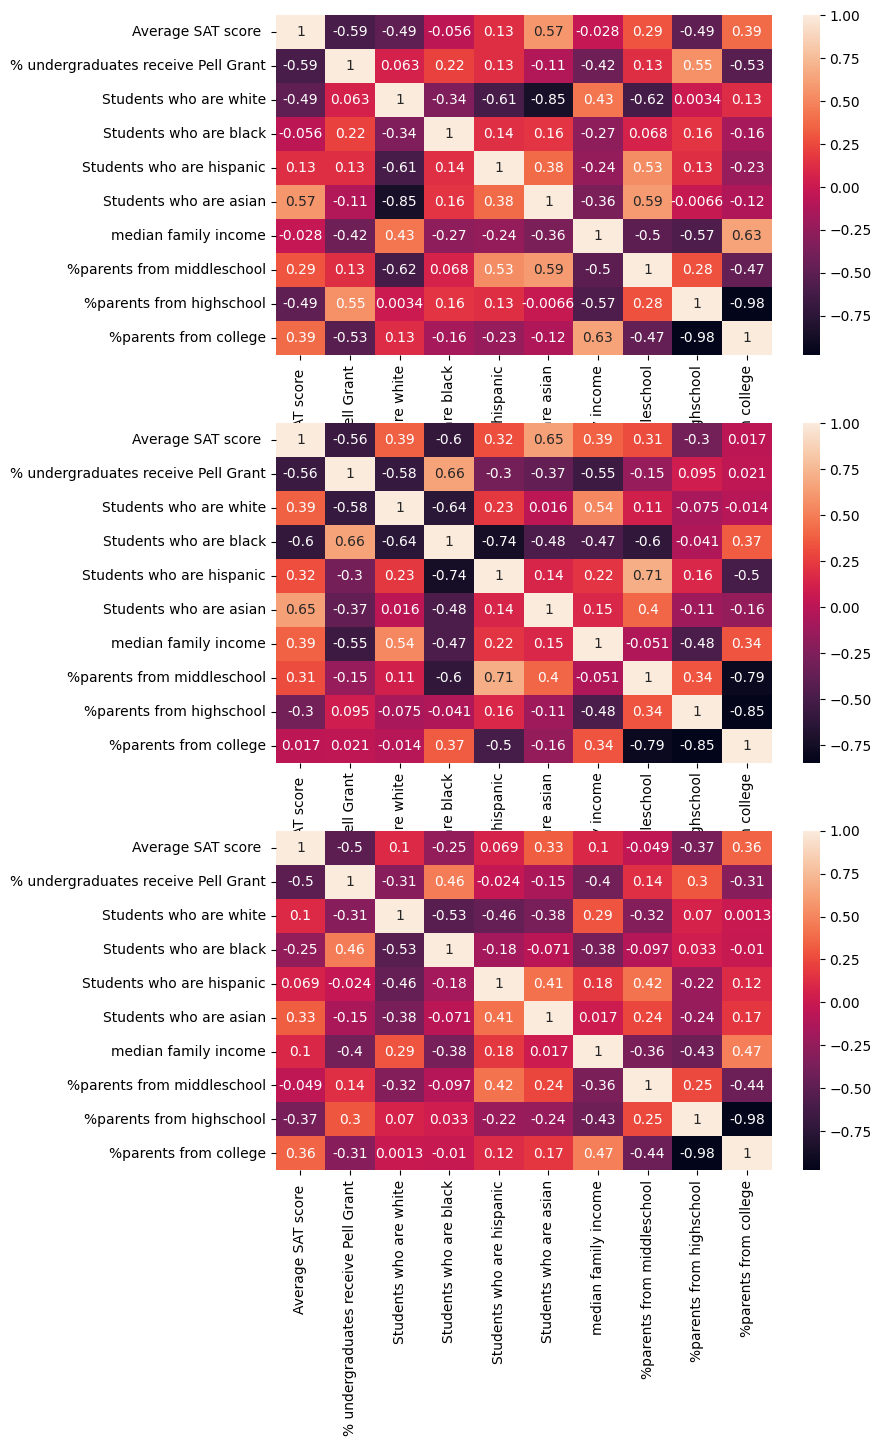

In [ ]:
fig, axs = plt.subplots(clusters, 1, figsize=(8, 5*clusters))
for i in range(clusters):
  sns.heatmap(cluster[i].drop(['median debt for Pell students', 'median debt for no-Pell students', 'median earnings 6 years after entry',
                              '5-year repayment rate with pell grant', '5-year repayment rate w/o pell grant', 'cluster'], axis = 1).corr(), annot=True, ax = axs[i])

**Model 1: Predict median earnings**

In [ ]:
cluster[0].head()

,Average SAT score,% undergraduates receive Pell Grant,median debt for Pell students,median debt for no-Pell students,median earnings 6 years after entry,5-year repayment rate with pell grant,5-year repayment rate w/o pell grant,Students who are white,Students who are black,Students who are hispanic,Students who are asian,median family income,%parents from middleschool,%parents from highschool,%parents from college,cluster
School ID,,,,,,,,,,,,,,,,
100751,1262.0,0.1718,19500.0,15000.0,44485.0,0.551958,0.739214,0.7695,0.1024,0.0512,0.0131,66733.0,0.008161,0.217552,0.774287,0
100858,1302.0,0.1343,19750.0,15000.0,49695.0,0.706790,0.848079,0.8101,0.0465,0.0355,0.0238,72031.0,0.006561,0.166086,0.827353,0
106397,1236.0,0.1858,16848.0,14475.0,43807.0,0.631250,0.775570,0.7454,0.0417,0.0995,0.0271,64201.0,0.023404,0.236558,0.740039,0
107044,1207.0,0.2286,24959.0,19500.0,39240.0,0.708625,0.835586,0.7993,0.0484,0.0392,0.0120,71055.0,0.010815,0.194665,0.794521,0
110097,1196.0,0.2775,21354.0,15750.0,42464.0,0.752422,0.878244,0.4285,0.0310,0.2085,0.1537,60489.0,0.016667,0.218841,0.764493,0


In [ ]:
X = []
y = []
for i in range(clusters): 
  X.append(cluster[i].drop(['median debt for Pell students', 'median debt for no-Pell students', 'median earnings 6 years after entry', 
                            '5-year repayment rate with pell grant', '5-year repayment rate w/o pell grant', 'cluster'], axis = 1))
  y.append(cluster[i]['median earnings 6 years after entry'])

Testing regression models with all data first to check which is most accurate.

In [ ]:
all_x = df_reg.drop(['median debt for Pell students', 'Students who are white', '%parents from college', 'median debt for no-Pell students', 'median earnings 6 years after entry', 
                            '5-year repayment rate with pell grant', '5-year repayment rate w/o pell grant', 'cluster'], axis = 1)
all_x['Lattitude'] = df_cluster['Lattitude']
all_x['Longitude'] = df_cluster['Longitude']
all_y = df_reg['median earnings 6 years after entry']

print(cross_val_score(xgb.XGBRegressor(random_state= 42), all_x, all_y, cv=5))
print(cross_val_score(ElasticNet(random_state= 42), all_x, all_y, cv=5))
print(cross_val_score(AdaBoostRegressor(random_state= 42), all_x, all_y, cv=5))
print(cross_val_score(RandomForestRegressor(random_state= 42), all_x, all_y, cv=5))

[0.69096847 0.61548388 0.64498365 0.67691928 0.56795721]
[0.42990369 0.49107014 0.48484654 0.60167028 0.51795135]
[0.66242674 0.5654036  0.5926757  0.65599427 0.64070942]
[0.7107373  0.66343748 0.71840841 0.72488142 0.64337182]


In [ ]:

#fig, axs = plt.subplots(clusters, 1, figsize=(5, 4 * clusters)) 
xgmodel = []
xgb_score_cv = []
pred_y = []
residuals = []
for i in range(clusters):
  xgmodel.append(xgb.XGBRegressor())
  xgb_score_cv.append(cross_val_score(xgmodel[i], X[i], y[i], cv=5))
  #xgmodel[i].fit(X[i], y[i])
  #pred_y.append(xgmodel[i].predict(X[i]))
  #residuals.append(pred_y[i] - y[i])
  #sns.residplot(x = pred_y[i], y = residuals[i], lowess=True, ax = axs[i])
  #axs[i].set_title(f'cluster {i}')
for i, score in enumerate(xgb_score_cv):
  print(f'cv score for cluster {i}: {score}')

cv score for cluster 0: [0.46326428 0.59277987 0.60239733 0.55404999 0.4003433 ]
cv score for cluster 1: [0.57956223 0.40293759 0.40198987 0.67349574 0.521046  ]
cv score for cluster 2: [ 0.39083715 -0.06958307  0.40545039  0.19484923  0.56401594]


In [ ]:
from sklearn.linear_model import ElasticNet
#fig, axs = plt.subplots(clusters, 1, figsize=(5, 4 * clusters)) #, figsize=(25, 12)
enmodel = []
en_score_cv = []
pred_y = []
residuals = []
for i in range(clusters):
  enmodel.append(ElasticNet(alpha=1.0, random_state=42))
  en_score_cv.append(cross_val_score(enmodel[i], X[i], y[i], cv=5))
  #enmodel[i].fit(X[i], y[i])
  #pred_y.append(enmodel[i].predict(X[i]))
  #residuals.append(pred_y[i] - y[i])
  #sns.residplot(x = pred_y[i], y = residuals[i], lowess=True, ax = axs[i])
  #axs[i].set_title(f'cluster {i}')
for i, score in enumerate(en_score_cv):
  print(f'cv score for cluster {i}: {score}')

cv score for cluster 0: [0.52077234 0.19928449 0.59244361 0.44542254 0.31079764]
cv score for cluster 1: [0.52343904 0.34472726 0.42648181 0.5581956  0.62847751]
cv score for cluster 2: [0.32325102 0.07387151 0.28019062 0.05279554 0.28697807]


cv score for cluster 0: [0.5850248  0.53295587 0.66501751 0.60760546 0.34631052]
cv score for cluster 1: [0.70983805 0.40816982 0.59453745 0.72656342 0.58885141]
cv score for cluster 2: [0.45956001 0.12483398 0.4951763  0.44736206 0.59526749]


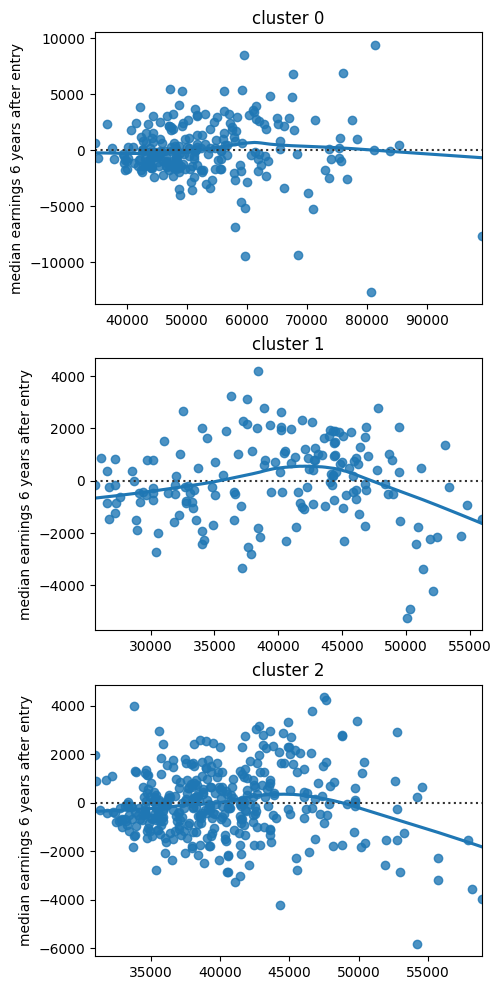

In [ ]:
fig, axs = plt.subplots(clusters, 1, figsize=(5, 4 * clusters)) 
rfmodel = []
rf_score_cv = []
pred_y = []
residuals = []
for i in range(clusters):
  rfmodel.append(RandomForestRegressor(random_state=42))
  rf_score_cv.append(cross_val_score(rfmodel[i], X[i], y[i], cv=5))
  rfmodel[i].fit(X[i], y[i])
  pred_y.append(rfmodel[i].predict(X[i]))
  residuals.append(pred_y[i] - y[i])
  sns.residplot(x = pred_y[i], y = residuals[i], lowess=True, ax = axs[i])
  axs[i].set_title(f'cluster {i}')
for i, score in enumerate(rf_score_cv):
  print(f'cv score for cluster {i}: {score}')

In [ ]:

#fig, axs = plt.subplots(clusters, 1, figsize=(5, 4 * clusters)) 
adamodel = []
ada_score_cv = []
pred_y = []
residuals = []
for i in range(clusters):
  adamodel.append(AdaBoostRegressor(random_state=42))
  ada_score_cv.append(cross_val_score(adamodel[i], X[i], y[i], cv=5))
  #rfmodel[i].fit(X[i], y[i])
  #pred_y.append(rfmodel[i].predict(X[i]))
  #residuals.append(pred_y[i] - y[i])
  #sns.residplot(x = pred_y[i], y = residuals[i], lowess=True, ax = axs[i])
  #axs[i].set_title(f'cluster {i}')
for i, score in enumerate(ada_score_cv):
  print(f'cv score for cluster {i}: {score}')

cv score for cluster 0: [0.68934205 0.53341076 0.59758756 0.58426675 0.40591487]
cv score for cluster 1: [0.6215852  0.3584888  0.54618394 0.70193016 0.47648289]
cv score for cluster 2: [0.35586652 0.1594669  0.52003398 0.40641833 0.55374495]


In [ ]:
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [100, 200] #, 200, 300, 400, 500
# Number of features to consider at every split
max_features = [1.0, 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [5, 10, 20, 30]
# Minimum number of samples required to split a node
min_samples_split = [i for i in range(1, 4)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False] #
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'random_state': [42]}

rfmodel = []
rf_best_params = []
X = []
y = []
pred_y = []
residuals = []
for i in range(1):
  X.append(cluster[i].drop(['median debt for Pell students', 'median debt for no-Pell students', 'median earnings 6 years after entry',  
                            '5-year repayment rate with pell grant', '5-year repayment rate w/o pell grant', 'cluster'], axis = 1))
  y.append(cluster[i]['5-year repayment rate w/o pell grant'])
  rf = RandomForestRegressor(random_state=42)
  rfmodel.append(GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3))
  rfmodel[i].fit(X[i], y[i])
  rf_best_params.append(rfmodel[i].best_params_)
for i, score in enumerate(rf_best_params):
  print(f'best params for cluster {i}: {score}')
print(rfmodel[0].best_score_)
"""

"\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\n# Number of trees in random forest\nn_estimators = [100, 200] #, 200, 300, 400, 500\n# Number of features to consider at every split\nmax_features = [1.0, 'sqrt', 'log2']\n# Maximum number of levels in tree\nmax_depth = [5, 10, 20, 30]\n# Minimum number of samples required to split a node\nmin_samples_split = [i for i in range(1, 4)]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [2, 3, 4, 5]\n# Method of selecting samples for training each tree\nbootstrap = [True, False] #\n# Create the random grid\nparam_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap,\n               'random_state': [42]}\n\nrfmodel = []\nrf_best_params = []\nX = 